# 画像のAxis Rateを変換する．

In [38]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pathlib
plt.style.use("ggplot")

## データフレームの作成

In [2]:
# dir path that has image data
dir_path = pathlib.Path('../data/dish')
dir_path_abs = dir_path.resolve()
label_path = pathlib.Path('../data/dish/clf_train_master.tsv').resolve()

In [3]:
# make table of label
label_df = pd.read_csv(label_path, delimiter='\t')
label_df.head(n=5)

,file_name,category_id
0,train_0.jpg,4
1,train_1.jpg,21
2,train_2.jpg,16
3,train_3.jpg,20
4,train_4.jpg,24


In [4]:
# label
cat_id_path = pathlib.Path("../data/dish/clf_category_master.tsv")
cat_df = pd.read_csv(cat_id_path, delimiter='\t')
cat_df.head()

,category_name,category_id
0,bread_sandwich,0
1,bread_sliced,1
2,bread_sweets,2
3,bread_table,3
4,noodle_somen,4


In [5]:
tmp = dict(cat_df.values)
tmp = {v:k for k, v in tmp.items()}
tmp

{0: 'bread_sandwich',
 1: 'bread_sliced',
 2: 'bread_sweets',
 3: 'bread_table',
 4: 'noodle_somen',
 5: 'noodle_udon',
 6: 'pasta_cream',
 7: 'pasta_gratin',
 8: 'pasta_japanese',
 9: 'pasta_oil',
 10: 'pasta_tomato',
 11: 'rice_boiled',
 12: 'rice_bowl',
 13: 'rice_curry',
 14: 'rice_fried',
 15: 'rice_risotto',
 16: 'rice_sushi',
 17: 'soup_miso',
 18: 'soup_potage',
 19: 'sweets_cheese',
 20: 'sweets_cookie',
 21: 'sweets_muffin',
 22: 'sweets_pie',
 23: 'sweets_pound',
 24: 'sweets_pudding'}

In [6]:
label_df["category_name"] = label_df["category_id"].map(tmp)
label_df.head()

,file_name,category_id,category_name
0,train_0.jpg,4,noodle_somen
1,train_1.jpg,21,sweets_muffin
2,train_2.jpg,16,rice_sushi
3,train_3.jpg,20,sweets_cookie
4,train_4.jpg,24,sweets_pudding


In [7]:
# Store the path to the image in the array.
image_paths = []
for image_path in dir_path_abs.glob("clf_train_images_labeled*/*.jpg"):
    image_paths.append(image_path)
# sort path
image_paths.sort(key=lambda path: int(path.parts[-1].split("_")[-1].split(".")[0]))

# concat image_paths with label_df
df = pd.concat((label_df, pd.Series(image_paths)),axis=1)

# change columns
columns = list(df.columns)
columns[-1] = "file path"
df.columns = columns
df.head()

,file_name,category_id,category_name,file path
0,train_0.jpg,4,noodle_somen,/home/yohei/Documents/tlab/data/dish/clf_train...
1,train_1.jpg,21,sweets_muffin,/home/yohei/Documents/tlab/data/dish/clf_train...
2,train_2.jpg,16,rice_sushi,/home/yohei/Documents/tlab/data/dish/clf_train...
3,train_3.jpg,20,sweets_cookie,/home/yohei/Documents/tlab/data/dish/clf_train...
4,train_4.jpg,24,sweets_pudding,/home/yohei/Documents/tlab/data/dish/clf_train...


In [8]:
df["file path"][0]

PosixPath('/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_0.jpg')

Text(0.5,1,'class: noodle_somen')

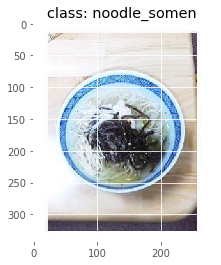

In [12]:
# Try to display the image as a trial
img = cv2.imread(str(df["file path"][0]))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("class: {}".format(df["category_name"][0]))

## 全カテゴリ内で最もAxis Rateが極端なものを見つける．

In [21]:
list(df["file path"].map(str))

['/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_0.jpg',
 '/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_1.jpg',
 '/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_2.jpg',
 '/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_3.jpg',
 '/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_4.jpg',
 '/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_5.jpg',
 '/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_6.jpg',
 '/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_7.jpg',
 '/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_8.jpg',
 '/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_9.jpg',
 '/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_10.jpg',
 '/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_11.jpg',
 '/home/yohei/Documents/tlab/data/dish

In [25]:
# load image
images = [
    cv2.imread(image_path)
    for image_path in list(df["file path"].map(str))
]

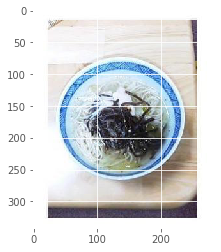

In [26]:
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))

In [27]:
# axis rate( height / width)を求める．
axis_rates = np.array([image.shape[0] / image.shape[1] for image in images])

### 最小値と最大値を求める

min: 0.24642857142857144
shape: (69, 280, 3)


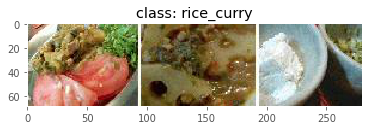

In [35]:
print("min:", axis_rates.min())
print("shape:", image[axis_rates.argmin()].shape)
plt.imshow(cv2.cvtColor(image[axis_rates.argmin()], cv2.COLOR_BGR2RGB))
plt.title("class: {}".format(df["category_name"][axis_rates.argmin()]))
plt.grid(False)

max:  2.7071428571428573
shape: (758, 280, 3)


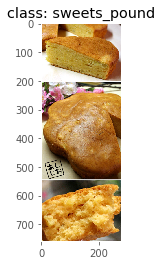

In [36]:
print("max: ", axis_rates.max())
print("shape:", image[axis_rates.argmax()].shape)
plt.imshow(cv2.cvtColor(image[axis_rates.argmax()], cv2.COLOR_BGR2RGB))
plt.title("class: {}".format(df["category_name"][axis_rates.argmax()]))
plt.grid(False)

/home/yohei/.pyenv/versions/miniconda3-latest/envs/chainer/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


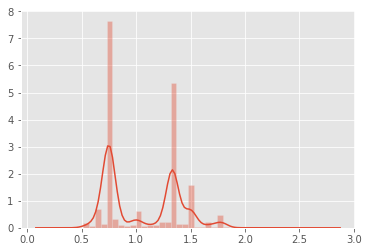

In [54]:
plt.rcParams["patch.force_edgecolor"] = True
sns.distplot(axis_rates, bins=None, kde=True) 

### どれだけaxis rateが2倍以上のものがあるのかを見る

In [69]:
tmp = pd.DataFrame
    axis_rates, columns=["axis rate"]).sort_values(
        'axis rate', ascending=False)
tmp.head(n=10)

,axis rate
7360,2.707143
7585,2.275000
8786,2.242857
1164,2.085973
2374,2.085409
881,2.067857
8847,1.989000
5517,1.920000
8255,1.871429
4081,1.857143


In [70]:
tmp.tail(n=10)

,axis rate
5209,0.560000
5643,0.560000
2842,0.556000
8282,0.555556
6372,0.542188
7740,0.536000
9804,0.500000
9302,0.489130
4841,0.470313
4265,0.246429


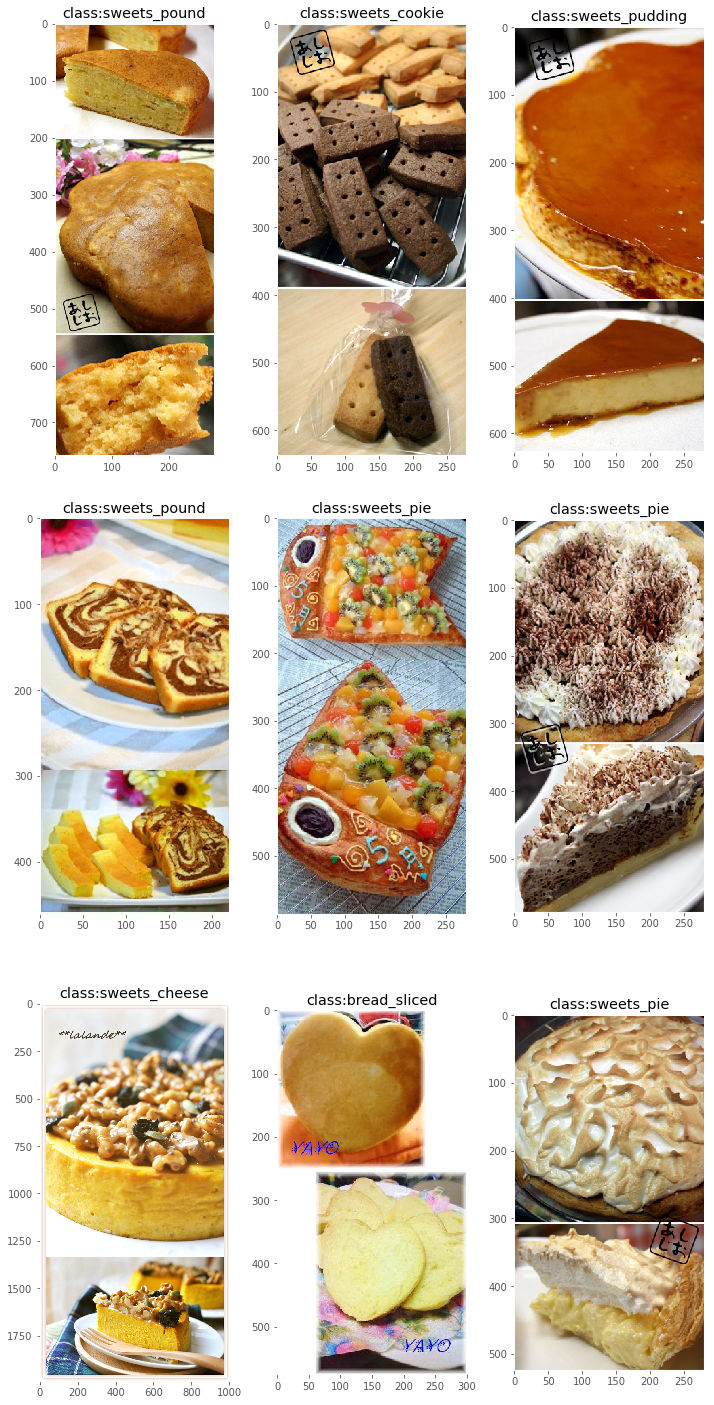

In [121]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 20))

for ax, index in zip(axes.flat, list(tmp_index)[:10]):
    ax.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
    ax.grid(False)
    ax.set_title("class:{}".format(df["category_name"][index]))
plt.tight_layout()
fig.savefig("axis_rate_min.jpg")

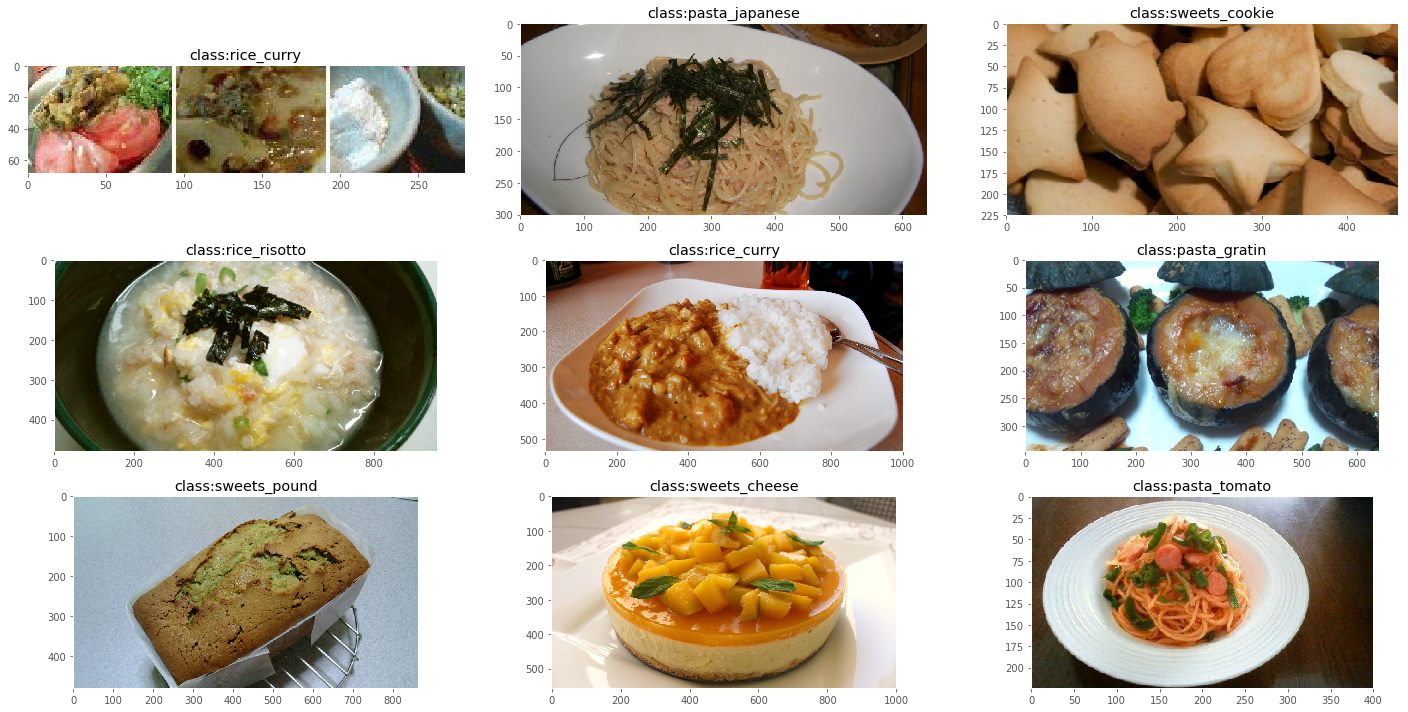

In [122]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

for ax, index in zip(axes.flat, list(tmp_index)[::-1][:15]):
    ax.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
    ax.grid(False)
    ax.set_title("class:{}".format(df["category_name"][index]))
plt.tight_layout()
fig.savefig("axis_rate_max.jpg")

### 上記のAxis Rateが極端(0.5, 2.0など)なデータ18枚に対してAxis Rateを変換する